### Module and data import

In [1]:
import time
import os
import sys
import itertools as it
from profilehooks import timecall
import pickle
import sympy
import copy
import re
import numpy as np
import pandas as pd
from pprint import pprint
from tqdm.notebook import tqdm
from tqdm import trange

from ceria_sac.data import *
from ceria_sac.ml import *
from ceria_sac.vis import *
from ceria_sac.misc import *
from ceria_sac.prep import *

# Sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SelectFromModel, SequentialFeatureSelector
from sklearn.inspection import permutation_importance
from eli5.sklearn import PermutationImportance
import sklearn


# Plotly
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, plot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.express as px

# Notebook and Pandas options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('mode.chained_assignment', None)
pd.options.display.max_colwidth = 200

init_notebook_mode(connected=True)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Filter warning of ill-conditioned matrix for Ridge.
import warnings
from scipy.linalg import LinAlgWarning
warnings.filterwarnings(action='ignore', category=LinAlgWarning, module='sklearn')
from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)

prep_calc_df = pd.read_csv(os.path.join(DATA_DIR, 'prep_calc_df.csv'), sep=';')

easy_combinatorics_set1a = easy_combinatorics(df_in=prep_calc_df, features_in=feature_set_1a)
easy_combinatorics_set1 = easy_combinatorics(df_in=prep_calc_df, features_in=feature_set_1)
easy_combinatorics_set12 = easy_combinatorics(df_in=prep_calc_df, features_in=feature_set_1+feature_set_2)
easy_combinatorics_set12_ids = easy_combinatorics(df_in=prep_calc_df, features_in=feature_set_1+feature_set_2_ids)
easy_combinatorics_set12_nol = easy_combinatorics(df_in=prep_calc_df, features_in=feature_set_1+feature_set_2_nol)
easy_combinatorics_set123 = easy_combinatorics(df_in=prep_calc_df, features_in=feature_set_1+feature_set_2+feature_set_3)
easy_combinatorics_set123_nol = easy_combinatorics(df_in=prep_calc_df, features_in=feature_set_1+feature_set_2_nol+feature_set_3)
easy_combinatorics_set123_ids = easy_combinatorics(df_in=prep_calc_df, features_in=feature_set_1+feature_set_2_ids+feature_set_3)
easy_combinatorics_bh = easy_combinatorics(df_in=prep_calc_df, features_in=feature_set_2)

combi_df = pd.concat([
    prep_calc_df,
    easy_combinatorics_set1a['df'],
    easy_combinatorics_set1['df'],
    easy_combinatorics_set12['df'],
    easy_combinatorics_set12_nol['df'],
    easy_combinatorics_set12_ids['df'],
    easy_combinatorics_set123['df'],
    easy_combinatorics_set123_nol['df'],
    easy_combinatorics_set123_ids['df'],
    easy_combinatorics_bh['df'],
    ], axis=1)

combi_df = combi_df.loc[:,~combi_df.columns.duplicated()]

fig3_range = [-1.4, 1.9]

primary_feature_sets = {
    'set1a': feature_set_1a,
    'set1': feature_set_1,
    'set12': feature_set_1+feature_set_2,
    'set12_nol': feature_set_1+feature_set_2_nol,
    'set12_ids': feature_set_1+feature_set_2_ids,
    'set123': feature_set_1+feature_set_2+feature_set_3,
    'set123_nol': feature_set_1+feature_set_2_nol+feature_set_3,
    'set123_ids': feature_set_1+feature_set_2_ids+feature_set_3,
}

secondary_feature_sets = {
    'combi_set1a': easy_combinatorics_set1a['features'],
    'combi_set1': easy_combinatorics_set1['features'],
    'combi_set12': easy_combinatorics_set12['features'],
    'combi_set12_nol': easy_combinatorics_set12_nol['features'],
    'combi_set12_ids': easy_combinatorics_set12_ids['features'],
    'combi_set123': easy_combinatorics_set123['features'],
    'combi_set123_nol': easy_combinatorics_set123_nol['features'],
    'combi_set123_ids': easy_combinatorics_set123_ids['features'],
    'combi_bh': feature_set_1+easy_combinatorics_bh['features'],
}

regression_runs = {
    'lreg': {},
    'ridge': {},
    'lasso': {},
    'en': {},
    'rf': {},
}


  easy_combinatorics (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/prep.py:581):
    0.219 seconds


  easy_combinatorics (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/prep.py:581):
    0.305 seconds


  easy_combinatorics (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/prep.py:581):
    0.736 seconds


  easy_combinatorics (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/prep.py:581):
    0.562 seconds


  easy_combinatorics (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/prep.py:581):
    0.727 seconds


  easy_combinatorics (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/prep.py:581):
    1.321 seconds


  easy_combinatorics (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/prep.py:581):
    1.403 seconds


  easy_combinatorics (/home/jgeiger/anaconda3/envs/ceria_sac/lib/pyt

In [ ]:
# pprint(secondary_feature_sets['combi_bh'])

In [ ]:
metal_ener_dict = {}
metal_ncoord_ener_dict = {}
metal_mos_ener_dict = {}
metal_ncoord_mos_ener_dict = {}

metal_nunique_dict = {}
metal_ncoord_nunique_dict = {}
metal_mos_nunique_dict = {}
metal_ncoord_mos_nunique_dict = {}

for metal in METALS:
    metal_df = prep_calc_df.loc[prep_calc_df['metal'] == metal]
    metal_nunique_dict[metal] = metal_df.nunique().to_dict()
    metal_ener_dict[metal] = metal_df['E_rel_global'].min()
    for ncoord in [2, 3, 4]:
        metal_ncoord_df = metal_df.loc[metal_df['ncoord'] == ncoord]
        metal_ncoord_ener_dict[(metal, ncoord)] = metal_ncoord_df['E_rel_global'].min()
        metal_ncoord_nunique_dict[(metal, ncoord)] = metal_ncoord_df.nunique().to_dict()
        for mos in range(5):
            metal_ncoord_mos_df = metal_ncoord_df.loc[metal_ncoord_df['mos'] == mos]
            if metal_ncoord_mos_df.shape[0] > 0:
                metal_ncoord_mos_ener_dict[(metal, ncoord, mos)] = metal_ncoord_mos_df['E_rel_global'].min()
                metal_ncoord_mos_nunique_dict[(metal, ncoord, mos)] = metal_ncoord_mos_df.nunique().to_dict()
    for mos in range(5):
        metal_mos_df = metal_df.loc[metal_df['mos'] == mos]
        if metal_mos_df.shape[0] > 0:
            metal_mos_ener_dict[(metal, mos)] = metal_mos_df['E_rel_global'].min()
            metal_mos_nunique_dict[(metal, mos)] = metal_mos_df.nunique().to_dict()
        
    # print(metal, metal_df['E_rel_global'].min())

metal_ener_dict = {k: np.round(v, 2) for k, v in sorted(metal_ener_dict.items(), key=lambda item: item[1])}
metal_ncoord_ener_dict = {k: np.round(v, 2) for k, v in sorted(metal_ncoord_ener_dict.items(), key=lambda item: item[1])}
metal_ncoord_mos_ener_dict = {k: np.round(v, 2) for k, v in sorted(metal_ncoord_mos_ener_dict.items(), key=lambda item: item[1])}

# pprint(metal_ener_dict, sort_dicts=False)
# pprint(metal_ncoord_ener_dict, sort_dicts=False)
# pprint(metal_ncoord_mos_ener_dict, sort_dicts=False)

# for k, v in metal_mos_nunique_dict.items():
#     if 'ir' in k:
#         print(k)
#         pprint(v)

In [ ]:
# for set_name, feature_set in primary_feature_sets.items():
#     print(set_name, len(feature_set))
#
# for set_name, feature_set in secondary_feature_sets.items():
#     print(set_name, len(feature_set))

In [ ]:
feature_sort_dict = {}

for column in feature_set_1a:
    temp_df = prep_calc_df[['metal']+feature_set_1a].drop_duplicates()
    temp_df = temp_df.sort_values(by=column)
    feature_sort_dict[column] = temp_df['metal'].tolist()
#     feature_sort_dict[column] = (temp_df['metal'].tolist()[0], temp_df['metal'].tolist()[-1])
    
pprint(feature_sort_dict, sort_dicts=False)

### Base error rate

In [ ]:
print(get_base_errors(df_in=prep_calc_df))

In [ ]:
# pprint(list(prep_calc_df.columns))

***
# Primary Features
## Linear regression
### LREG for the different primary feature sets

In [ ]:
for set_name, feature_set in primary_feature_sets.items():
    
    lreg_set = run_regr(
        df_in=prep_calc_df, ml_model=LinearRegression(),
        ml_features=feature_set, ml_target=['E_rel_global'],
        n_splits=N_SPLITS, full_cv=True, split_shuffle=False,
    )
    regression_runs['lreg'][set_name] = lreg_set
    
    lreg_energy_fig_set = plot_energies(
        result_dict=lreg_set['result_dict'], error_dict=lreg_set['error_dict'],
        reference='global', cv_id=0, showticklabels=False, set_range=fig3_range,
    )

    # lreg_energy_fig_set.show()
    plotly_to_image(plotly_fig=lreg_energy_fig_set, path_elements=('lreg', 'lreg_energy_fig_'+set_name))

***
### Linear Regression for each metal separately (error measures ill-behaved)

In [ ]:
for metal in METALS:
    metal_df = prep_calc_df.loc[(prep_calc_df['metal'] == metal)]  # .sample(frac=1, random_state=0).reset_index(drop=True) # Additional shuffling of the splits. Does not change variability.
    # print("{}-MOS average: {:.1f}".format(metal, np.mean(metal_df['mos'].to_numpy())))

    metal_lreg_global = run_regr(
        df_in=metal_df, ml_model=LinearRegression(),
        ml_features=feature_set_2, ml_target=['E_rel_global'],
        n_splits=N_SPLITS, full_cv=True, split_shuffle=False,
    )

    metal_lreg_global_energy_fig = plot_energies(
        result_dict=metal_lreg_global ['result_dict'], error_dict=metal_lreg_global ['error_dict'],
        reference='global', cv_id=np.argmin(metal_lreg_global ['error_dict']['rmse_tests']), which_error='mean'
    )

    # metal_lreg_global_energy_fig.show()
    # plotly_to_image(plotly_fig=metal_lreg_global_energy_fig, path_elements=('lreg', metal+'_lreg_energy_fig'))

***
## Lasso
### Vary amount of regularization

In [ ]:
# Lasso does not converge for too low alpha values, below 1e-5...
lasso_global_dict = vary_ml_param(
    df_in=prep_calc_df, ml_features=feature_set_1+feature_set_2, ml_target=['E_rel_global'],
    ml_base_model=Lasso(**lasso_dict),
    ml_param_dict={'alpha': np.linspace(start=float('1e-5'), stop=float('5e-1'), num=1000)},
    full_cv=True, split_shuffle=False, verbose=False,
)

# lasso_global_dict['ener_fig_global'].show()
# lasso_global_dict['error_fig'].show()

_ = lasso_global_dict['error_fig'].update_yaxes(range=[0.35, 0.75], tick0=0.4, dtick=0.1, secondary_y=False)
_ = lasso_global_dict['error_fig'].update_yaxes(range=[-0.05, 0.75], tick0=0, dtick=0.2, secondary_y=True)

plotly_to_image(plotly_fig=lasso_global_dict['error_fig'], path_elements=('lasso', 'lasso_varyreg_error_fig'))
plotly_to_image(plotly_fig=lasso_global_dict['ener_fig_global'], path_elements=('lasso', 'lasso_varyreg_energy_fig'))


### Lasso for different primary feature sets

In [ ]:
for set_name, feature_set in primary_feature_sets.items():

    lasso_set = run_regr(
        df_in=prep_calc_df, ml_model=Lasso(**lasso_dict),
        ml_features=feature_set_1, ml_target=['E_rel_global'],
        n_splits=N_SPLITS, full_cv=True, split_shuffle=False,
    )
    regression_runs['lasso'][set_name] = lasso_set
    
    lasso_energy_fig_set = plot_energies(
        result_dict=lasso_set['result_dict'], error_dict=lasso_set['error_dict'],
        reference='global', cv_id=0, showticklabels=False, set_range=fig3_range,
    )
    
    # lasso_energy_fig_set.show()
    plotly_to_image(plotly_fig=lasso_energy_fig_set, path_elements=('lasso', 'lasso_energy_fig_'+set_name))

### Run lasso for each metal

In [ ]:
for metal in METALS:
    metal_df = prep_calc_df.loc[(prep_calc_df['metal'] == metal)]
    # print("{}-MOS average: {:.1f}".format(metal, np.mean(metal_df['mos'].to_numpy())))
    lasso_dict2 = copy.deepcopy(lasso_dict)
    lasso_dict2['alpha'] = float('1e-5')
    metal_lasso_global = run_regr(
        df_in=metal_df, ml_model=Lasso(**lasso_dict2),
        ml_features=feature_set_1+feature_set_2, ml_target=['E_rel_global'],
        n_splits=N_SPLITS, full_cv=True, split_shuffle=False,
    )

    metal_lasso_global_energy_fig = plot_energies(
        result_dict=metal_lasso_global ['result_dict'], error_dict=metal_lasso_global ['error_dict'],
        reference='global', cv_id=np.argmin(metal_lasso_global ['error_dict']['rmse_tests']),
    )

    # metal_lasso_global_energy_fig.show()
    plotly_to_image(plotly_fig=metal_lasso_global_energy_fig, path_elements=('lasso', metal+'_lasso_energy_fig'))

***
## Ridge
### Vary amount of regularization

In [ ]:
ridge_global_dict = vary_ml_param(
    df_in=prep_calc_df, ml_features=feature_set_1+feature_set_2, ml_target=['E_rel_global'],
    ml_base_model=Ridge(**ridge_dict),
    ml_param_dict={'alpha': np.linspace(start=float('1e-3'), stop=float('1e3'), num=1000)},
    full_cv=True, split_shuffle=False, verbose=False,
)

_ = ridge_global_dict['error_fig'].update_yaxes(range=[0.35, 0.75], tick0=0.4, dtick=0.1, secondary_y=False)
_ = ridge_global_dict['error_fig'].update_yaxes(range=[-0.05, 0.75], tick0=0, dtick=0.2, secondary_y=True)

plotly_to_image(plotly_fig=ridge_global_dict['error_fig'], path_elements=('ridge', 'ridge_varyreg_error_fig'))
plotly_to_image(plotly_fig=ridge_global_dict['ener_fig_global'], path_elements=('ridge', 'ridge_varyreg_energy_fig'))

# y_range = ridge_global_dict['error_fig'].full_figure_for_development(warn=False).layout.yaxis.range
# y2_range = ridge_global_dict['error_fig'].full_figure_for_development(warn=False).layout.yaxis2.range

# ridge_global_dict_low_range = vary_ml_param(
#     df_in=prep_calc_df, ml_features=feature_set_1+feature_set_2, ml_target=['E_rel_global'],
#     ml_base_model=Ridge(**ridge_dict),
#     # ml_param_dict={'alpha': np.linspace(start=float('1e0'), stop=float('1e1'), num=3)},
#     ml_param_dict={'alpha': np.linspace(start=float('1e-3'), stop=float('5e1'), num=100)},
#     full_cv=True, split_shuffle=False, verbose=False,
# )
#
# ridge_global_dict_low_range['error_fig'] = ridge_global_dict_low_range['error_fig'].update_layout(go.Layout(yaxis_range=y_range, yaxis2=dict(range=y2_range)))
#
# # ridge_global_dict_low_range['ener_fig_global'].show()
# # ridge_global_dict_low_range['error_fig'].show()
#
# plotly_to_image(plotly_fig=ridge_global_dict_low_range['error_fig'], path_elements=('ridge', 'ridge_varyreg_error_fig_low_range'))
# plotly_to_image(plotly_fig=ridge_global_dict_low_range['ener_fig_global'], path_elements=('ridge', 'ridge_varyreg_energy_fig_low_range'))

### Run ridge for each metal

In [ ]:
for metal in METALS:
    metal_df = prep_calc_df.loc[(prep_calc_df['metal'] == metal)]
    # print("{}-MOS average: {:.1f}".format(metal, np.mean(metal_df['mos'].to_numpy())))
    metal_ridge_global = run_regr(
        df_in=metal_df, ml_model=Ridge(**ridge_dict),
        ml_features=feature_set_2+feature_set_3, ml_target=['E_rel_global'],
        n_splits=N_SPLITS, full_cv=True, split_shuffle=False,
    )

    metal_ridge_global_energy_fig = plot_energies(
        result_dict=metal_ridge_global ['result_dict'], error_dict=metal_ridge_global ['error_dict'],
        reference='global', cv_id=np.argmin(metal_ridge_global ['error_dict']['rmse_tests']), which_error='mean'
    )

    # metal_ridge_global_energy_fig.show()
    plotly_to_image(plotly_fig=metal_ridge_global_energy_fig, path_elements=('ridge', metal+'_ridge_energy_fig'))

### Run ridge for each coordination

In [ ]:
for ncoord in [2, 3, 4]:
    ncoord_df = prep_calc_df.loc[(prep_calc_df['ncoord'] == ncoord)]

    ridge_global = run_regr(
        df_in=ncoord_df, ml_model=Ridge(**ridge_dict),
        ml_features=feature_set_1+feature_set_2, ml_target=['E_rel_global'],
        n_splits=N_SPLITS, full_cv=True, split_shuffle=False,
    )

    ridge_global_energy_fig = plot_energies(
        result_dict=ridge_global['result_dict'], error_dict=ridge_global['error_dict'],
        reference='global', cv_id=np.argmin(ridge_global['error_dict']['rmse_tests']),
    )

    # ridge_global_energy_fig.show()
    plotly_to_image(plotly_fig=ridge_global_energy_fig, path_elements=('ridge', '{}O_ridge_energy_fig'.format(ncoord)))

### Ridge for the different primary feature sets

In [ ]:
for set_name, feature_set in primary_feature_sets.items():

    ridge_set = run_regr(
        df_in=combi_df, ml_model=Ridge(**ridge_dict),
        ml_features=feature_set, ml_target=['E_rel_global'],
        n_splits=N_SPLITS, full_cv=True, split_shuffle=False,
    )
    regression_runs['ridge'][set_name] = ridge_set

    ridge_energy_fig_set = plot_energies(
        result_dict=ridge_set['result_dict'], error_dict=ridge_set['error_dict'],
        reference='global', cv_id=0, showticklabels=False, set_range=fig3_range,
    )

    # ridge_energy_fig_set.show()
    plotly_to_image(plotly_fig=ridge_energy_fig_set, path_elements=('ridge', 'ridge_energy_fig_'+set_name))

***
## Elastic net
### Vary amount and ratio of regularization

In [ ]:
# en_final_scan_global = run_en_scan(
#     en_df=prep_calc_df, en_features=feature_set_1+feature_set_2, en_target=['E_rel_global'],
#     en_alphas=np.linspace(start=float('1e-3'), stop=0.05, num=50),
#     en_l1_ratios=np.linspace(start=float('1e-2'), stop=0.99, num=50),
# )
#
# en_final_scan_global_heatmap = plot_en_scan(result_dict=en_final_scan_global, numfeat_thresh=1000, rmse_thresh=10)
#
# en_final_scan_global_heatmap.show()
# plotly_to_image(plotly_fig=en_final_scan_global_heatmap, path_elements=('en', 'en_scan_heatmap'))

### EN for the different primary feature sets

In [ ]:
for set_name, feature_set in primary_feature_sets.items():

    en_set = run_regr(
        df_in=prep_calc_df, ml_model=ElasticNet(**en_dict),
        ml_features=feature_set_1, ml_target=['E_rel_global'],
        n_splits=N_SPLITS, full_cv=True, split_shuffle=False,
    )

    regression_runs['en'][set_name] = en_set

    en_energy_fig_set = plot_energies(
        result_dict=en_set['result_dict'], error_dict=en_set['error_dict'],
        reference='global', cv_id=0, showticklabels=False, set_range=fig3_range,
    )
    
    # en_energy_fig_set.show()
    plotly_to_image(plotly_fig=en_energy_fig_set, path_elements=('en', 'en_energy_fig_'+set_name))

## Random Forest

### Hyperparameter Tuning
<TT> n_estimators, max_depth, max_features </TT>

In [ ]:
# Hyperparameter tuning for RF. Code adapted from:
# https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

# Usage of only training data for hyperparameter tuning:
# https://stats.stackexchange.com/questions/436894/should-a-training-set-be-used-for-grid-search-with-cross-validation

# Usage of max_features=0.333:
# According to Elements of Statistical Learning (section 15.3):
# Recommended default values are m=p/3 for regression problems and m=sqrt(p) for classification problems (attributed to Breiman)
# https://stats.stackexchange.com/questions/324370/references-on-number-of-features-to-use-in-random-forest-regression

In [ ]:
# rf_estimator_dict = vary_ml_param(df_in=prep_calc_df, ml_features=feature_set_1+feature_set_2, ml_target=['E_rel_global'],
#                                   ml_base_model=RandomForestRegressor(**rf_dict),
#                                   ml_param_dict={'n_estimators': list(range(1, 302, 5))},
#                                   full_cv=True, split_shuffle=False, verbose=False,
#                                   )

# # rf_estimator_dict['error_fig'].show()

# rf_depth_dict = vary_ml_param(df_in=prep_calc_df, ml_features=feature_set_1+feature_set_2, ml_target=['E_rel_global'],
#                               ml_base_model=RandomForestRegressor(**rf_dict),
#                               ml_param_dict={'max_depth': list(range(1, 16))},
#                               full_cv=True, split_shuffle=False, verbose=False,
#                               )

# # rf_depth_dict['error_fig'].show()

# rf_subset_dict = vary_ml_param(df_in=prep_calc_df, ml_features=feature_set_1+feature_set_2, ml_target=['E_rel_global'],
#                                ml_base_model=RandomForestRegressor(**rf_dict),
#                                ml_param_dict={'max_features': np.arange(0.05, 1.05, 0.05)},
#                                full_cv=True, split_shuffle=False, verbose=False,
#                                )

# # rf_subset_dict['error_fig'].show()

In [ ]:
# _ = rf_estimator_dict['error_fig'].update_layout(go.Layout(yaxis_range=(0, 0.6)))
# plotly_to_image(plotly_fig=rf_estimator_dict['error_fig'], path_elements=('rf', 'rf_nestimator_fig'))
# _ = rf_depth_dict['error_fig'].update_layout(go.Layout(yaxis_range=(0, 0.6)))
# plotly_to_image(plotly_fig=rf_depth_dict['error_fig'], path_elements=('rf', 'rf_depth_fig'))
# _ = rf_subset_dict['error_fig'].update_layout(go.Layout(yaxis_range=(0, 0.6)))
# plotly_to_image(plotly_fig=rf_subset_dict['error_fig'], path_elements=('rf', 'rf_subset_fig'))

***
### Varying the number of features used in RF

In [47]:
def rf_feature_plot(df_in, rf_target, rf_features, max_features, verbose=False,):

    max_features += 1
    errors_array = np.zeros(shape=(max_features, 6))
    selected_feats = []

    for in_features, n_features in enumerate(list(range(1, max_features+1))):

        init_rf = run_regr(df_in=df_in,
                         ml_model=RandomForestRegressor(**rf_dict),
                         ml_features=rf_features,
                         ml_target=rf_target,
                         full_cv=True
                         )

        selector = SelectFromModel(estimator=init_rf['ml_models'][init_rf['best_id']], prefit=True,
                                   max_features=n_features, threshold=-np.inf)

        selected_features = list(it.compress(rf_features, selector.get_support()))

        if len(selected_features) < 8:
            max_depth = len(selected_features)
        else:
            max_depth = 8

        rf_dict['max_depth'] = max_depth

        reduced_rf_run = run_regr(df_in=prep_calc_df,
                            ml_model=RandomForestRegressor(**rf_dict),
                            ml_features=selected_features,
                            ml_target=rf_target,
                            )

        selected_feats.append(selected_features)

        error_dict = reduced_rf_run['error_dict']
        errors_array[in_features, :] = np.mean(list(error_dict.values()))

        if verbose is True:

            # pprint(error_dict, sort_dicts=False)
            print("R^2 (train): {:.3f}; R^2 (test): {:.3f}; RMSE (train): {:.3f}; RMSE (test): {:.3f}".format(
            error_dict['rmse_trains'], error_dict['rmse_tests'],
            error_dict['rsquared_trains'], error_dict['rsquared_tests'],
            ))
            print(n_features, selected_features)
            if in_features > 0:
                print("Just added: {} | Was removed: {}".format(
                    [feat for feat in selected_feats[-1] if feat not in selected_feats[-2]],
                    [feat for feat in selected_feats[-2] if feat not in selected_feats[-1]]))
            print('='*100)

    error_headers = [error_key.replace('_', 's_') for error_key in error_dict.keys()]
    errors_dict = {key: value for key, value in zip(error_headers, errors_array.transpose())}

    rf_feat_fig = plot_errors(error_dict=errors_dict, x_values=list(range(1, max_features)),
                              annot_text=selected_feats, x_title='Number of Features',
                              plot_measures=['rmses_trains', 'rmses_tests', 'rsquareds_trains',  'rsquareds_tests'],)

    return rf_feat_fig

rf_feat_fig_global = rf_feature_plot(df_in=prep_calc_df, rf_target=['E_rel_global'], rf_features=feature_set_1+feature_set_2, max_features=20,)
# plotly_to_image(plotly_fig=rf_feat_fig_global, path_elements=('rf', 'rf_feat_fig'))
rf_feat_fig_global.show()

KeyError: 'rsquareds_trains'

### RF for the different primary feature sets

In [61]:
for set_name, feature_set in primary_feature_sets.items():

    rf_set = run_regr(
        df_in=prep_calc_df, ml_model=RandomForestRegressor(**rf_dict),
        ml_features=feature_set, ml_target=['E_rel_global'],
        n_splits=N_SPLITS, full_cv=True, split_shuffle=False,
    )
    regression_runs['rf'][set_name] = rf_set

    rf_energy_fig_set = plot_energies(
        result_dict=rf_set['result_dict'], error_dict=rf_set['error_dict'],
        reference='global', cv_id=0, showticklabels=False, set_range=fig3_range,
    )

    # rf_energy_fig_set.show()
    plotly_to_image(plotly_fig=rf_energy_fig_set, path_elements=('rf', 'rf_energy_fig_'+set_name))


  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    1.413 seconds


  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    1.316 seconds


  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    1.365 seconds


  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    1.217 seconds


  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    1.334 seconds


  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    1.217 seconds


  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    1.317 seconds


  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:

### Recursive Feature elimination

29


RFECV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
      estimator=RandomForestRegressor(max_depth=8, max_features=0.4,
                                      n_estimators=128, n_jobs=-1,
                                      random_state=0),
      min_features_to_select=3, n_jobs=-1)

Optimal number of features : 25


<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'Number of features selected')

Text(0, 0.5, 'Cross validation score (accuracy)')

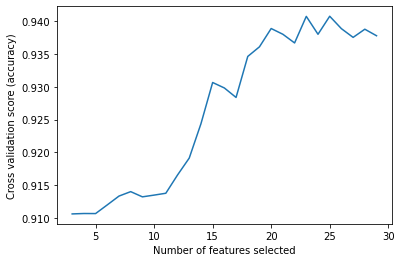

In [33]:
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFECV

devel_df = prep_calc_df.iloc[:10000]

print(len(feature_set))
feature_set = primary_feature_sets['set12']
X = devel_df[feature_set].values
y = devel_df['E_rel_global'].values

min_features_to_select = 3  # Minimum number of features to consider
rfecv = RFECV(
    estimator=RandomForestRegressor(**rf_dict),
    step=1,
    cv=KFold(n_splits=5, random_state=None, shuffle=False),
#     scoring="accuracy",
    min_features_to_select=min_features_to_select,
    n_jobs=-1,
)

rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
)
plt.show()



In [36]:
ranking_dict = dict(list(zip(feature_set, rfecv.ranking_)))
print(ranking_dict)


{'Z': 1, 'EN': 1, 'EA': 1, 'phi': 1, 'homo': 1, 'lumo': 1, 'gap': 1, 'polar': 1, 'rp_z': 1, 'r_cov': 1, 'MM_bd': 1, 'MO_enthalpy': 1, 'E_coh': 1, 'E_ox': 1, 'MO_calc': 1, 'ncoord': 1, 'mos': 1, 'cum_IE_N': 1, 'o_per_ce3_sepd': 1, 'o_per_ce3_shared': 1, 'ce_layer_frac': 1, 'sum(1/d-MCe3_l)': 1, 'min(1/d-MCe3_l)': 2, 'mean(1/d-MCe3_l)': 1, 'max(1/d-MCe3_l)': 3, 'std(1/d-MCe3_l)': 5, 'sum(1/d-Ce3Ce3_l)': 1, 'mean(1/d-Ce3Ce3_l)': 1, 'std(1/d-Ce3Ce3_l)': 4}


In [45]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
import itertools as it

rfe_features = feature_set
rfe_target = "E_rel_global"
r_squareds, descs = [], []

# lreg_fig = make_subplots(
#     rows=5, cols=6, #subplot_titles=['Co', 'Ni', 'Cu', 'Rh', 'Pd', 'Ag', 'Ir', 'Pt', 'Au'],
#     horizontal_spacing = 0.01, vertical_spacing=0.01,
# )

# ids = [(i,j) for i in range(1,6) for j in range(1,7)]

devel_df = prep_calc_df.iloc[:10000]

print(len(feature_set_1), len(feature_set_2), len(feature_set))
feature_set = primary_feature_sets['set12']
show_legend = True
n_descs = list(range(4, len(rfe_features)))

for in_desc, n_desc in enumerate(n_descs):

    # Setup and run RFE to select most important features
    rfe_pipe = Pipeline([
        ('rfe', RFE(
            estimator=RandomForestRegressor(**rf_dict),
            n_features_to_select=n_desc))
    ])

    _= rfe_pipe.fit(devel_df[rfe_features].values, devel_df[rfe_target])
    rfe_df = devel_df[list(it.compress(rfe_features, rfe_pipe['rfe'].support_))]
    descs.append(list(rfe_df.columns))

    # Run linear regression pipeline for descriptor subset from RFE
    X, y = rfe_df.values, devel_df[rfe_target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=False)

    rf_pipe = Pipeline([
        ('rf', RandomForestRegressor(**rf_dict)),
    ])

    y_train_pred, y_test_pred = rf_pipe.fit(X_train, y_train).predict(X_train), rf_pipe.fit(X_train, y_train).predict(X_test)

    # Define helper-df with results of lreg(rfe) for easier plotting
    lreg_df = pd.DataFrame({
        'metal': devel_df['metal'].to_list(),
        'y_true': np.concatenate([y_train, y_test]),
        'y_pred': np.concatenate([y_train_pred, y_test_pred]),
        'plot_label': devel_df['plot_label'].to_list(),
    })

    # Obtain R^2 for predictions
    correlation_matrix = np.corrcoef(np.concatenate([y_train, y_test]), np.concatenate([y_train_pred, y_test_pred]))
    correlation_xy = correlation_matrix[0,1]
    r_squareds.append(correlation_xy**2)

#     # Ideal fit line
#     ideal = np.arange(0, 7.5, .01)
#     _ = lreg_fig.add_trace(
#         go.Scatter(
#             x=ideal,
#             y=ideal,
#             mode='lines', line=dict(color='rgb(0, 0, 0, 0.5)', width=1), hoverinfo='skip', showlegend=False,
#         ),
#         row=ids[in_desc][0], col=ids[in_desc][1],
#     )

#     for metal in metals:
#         metal_df = lreg_df.loc[lreg_df['metal'] == metal]
#         data_text = metal_df['plot_label'].to_list()
#         desc_text = ['<br>['+', '.join(list(map(str, list(rfe_df.columns))))+']<br>' for i in range(len(data_text))]
#         label_strings = [desc_text[i]+data_text[i] for i in range(len(data_text))]

#         # Plot actual data points
#         _ = lreg_fig.add_trace(
#             go.Scatter(
#                 x=lreg_df.loc[lreg_df['metal'] == metal].iloc[:,1],
#                 y=lreg_df.loc[lreg_df['metal'] == metal].iloc[:,2],
#                 mode='markers', marker_color=color_dict[metal], marker=dict(size=5), hoverinfo='text+x+y',
#                 name=metal.title(), text=label_strings, legendgroup=metal, showlegend=show_legend,
#             ),
#             row=ids[in_desc][0], col=ids[in_desc][1],
#         )

#     show_legend=False

#     # Add value of R^2 as text to plot
#     _ = lreg_fig.add_trace(
#         go.Scatter(
#             x=[1.5],
#             y=[7],
#             mode='markers+text', marker=dict(color='white', size=0), hoverinfo='skip',
#             text=["R^2 = {}".format(round(r_squareds[-1], 4))],
#             showlegend=False,
#         ),
#         row=ids[in_desc][0], col=ids[in_desc][1],
#     )

#     # Axis layout
#     _ = lreg_fig.update_xaxes(range=[-0.5,8], showgrid=False, showticklabels=False, row=ids[in_desc][0], col=ids[in_desc][1],)
#     _ = lreg_fig.update_yaxes(range=[-0.5,8], showgrid=False, showticklabels=False, row=ids[in_desc][0], col=ids[in_desc][1],)

# # Layout for figure with different linear regressions from RFE-selected features
# lreg_layout = go.Layout(
#     width=1850, height=1050, font=dict(size=12), margin=go.layout.Margin(l=0, r=0, b=0, t=50,),
#     hoverlabel = {'namelength': -1},
#     title=dict(text='Different linear regressions from feature subsets selected by RFE', x=0.5,),
# )
# dummy_var = lreg_fig.update_layout(lreg_layout)
# dummy_var = plot(lreg_fig, filename='./html_figures/rfe_lreg_uncorr.html', auto_open=False)
# del lreg_fig


# Plotting of results
rfe_fig = go.Figure()

dummy_var = rfe_fig.add_trace(
    go.Scatter(
        x=n_descs,
        y=r_squareds,
        text=['<br>'.join(desc_list) for desc_list in descs],
        mode='lines+markers', hoverinfo='text+x+y+z',
    ))

rfe_layout = go.Layout(
    # width=1500, height=700, font=dict(size=16), margin=go.layout.Margin(l=0, r=0, b=0, t=100,),  # Presentation
    width=1000, height=600, font=dict(size=12), margin=go.layout.Margin(l=0, r=0, b=0, t=50,),
    hoverlabel = {'namelength': -1}, hovermode='x unified',
    title=dict(text='Different linear regressions from features selected by RFE', x=0.5,),
    xaxis=dict(title='# features'),
    yaxis=dict(title='R^2'),
)
dummy_var = rfe_fig.update_layout(rfe_layout)
rfe_fig.show()
# dummy_var = plot(rfe_fig, filename='./html_figures/rfe_uncorr.html', auto_open=False)
del rfe_fig

18 11 29


In [78]:
feature_set = primary_feature_sets['set12']
print(feature_set_1a)
base_model_errors = regression_runs['rf']['set12']['error_dict']

print("MAE: {:.3f} | RMSE: {:.3f}".format(
  np.average(base_model_errors['mae_tests']),
  np.average(base_model_errors['rmse_tests']))
     )

should_be_removed = []
for removed_feature in feature_set:
    reduced_set = [_ for _ in feature_set if _ is not removed_feature]

    rf_set = run_regr(
        df_in=prep_calc_df, ml_model=RandomForestRegressor(**rf_dict),
        ml_features=reduced_set, ml_target=['E_rel_global'],
        n_splits=N_SPLITS, full_cv=True, split_shuffle=False,
    )
    
    reduced_model_errors = rf_set['error_dict']
    
    print("Feature: {:.40s} | MAE: {:.3f} | RMSE: {:.3f}".format(
          removed_feature,
          np.average(reduced_model_errors['mae_tests']),
          np.average(reduced_model_errors['rmse_tests']))
         )
    
    if np.average(reduced_model_errors['mae_tests']) < np.average(base_model_errors['mae_tests']):
        should_be_removed.append(removed_feature)
    
#     print("Feature: {:<14s} | MAE: {:.3f} | RMSE: {:.3f}".format(
#           removed_feature,
#           100*np.average(reduced_model_errors['mae_tests'])/np.average(base_model_errors['mae_tests']),
#           100*np.average(reduced_model_errors['rmse_tests'])/np.average(base_model_errors['rmse_tests']))
#          )
    
#     rf_energy_fig_set = plot_energies(
#         result_dict=rf_set['result_dict'], error_dict=rf_set['error_dict'],
#         reference='global', cv_id=0, showticklabels=False, set_range=fig3_range,
#     )

#     # rf_energy_fig_set.show()
#     plotly_to_image(plotly_fig=rf_energy_fig_set, path_elements=('rf', 'rf_energy_fig_'+set_name))

['Z',
 'EN',
 'EA',
 'phi',
 'homo',
 'lumo',
 'gap',
 'polar',
 'rp_z',
 'r_cov',
 'MM_bd',
 'MO_enthalpy',
 'E_coh',
 'E_ox',
 'MO_calc',
 'ncoord',
 'mos',
 'cum_IE_N',
 'o_per_ce3_sepd',
 'o_per_ce3_shared',
 'ce_layer_frac',
 'sum(1/d-MCe3_l)',
 'min(1/d-MCe3_l)',
 'mean(1/d-MCe3_l)',
 'max(1/d-MCe3_l)',
 'std(1/d-MCe3_l)',
 'sum(1/d-Ce3Ce3_l)',
 'mean(1/d-Ce3Ce3_l)',
 'std(1/d-Ce3Ce3_l)']

['Z', 'EN', 'EA', 'phi', 'homo', 'lumo', 'gap', 'polar', 'rp_z', 'r_cov', 'MM_bd', 'MO_enthalpy', 'E_coh', 'E_ox', 'MO_calc']
MAE: 0.117 | RMSE: 0.164
Feature: Z | MAE: 0.115 | RMSE: 0.162
Feature: EN | MAE: 0.115 | RMSE: 0.163
Feature: EA | MAE: 0.115 | RMSE: 0.163
Feature: phi | MAE: 0.114 | RMSE: 0.163
Feature: homo | MAE: 0.114 | RMSE: 0.163
Feature: lumo | MAE: 0.115 | RMSE: 0.163
Feature: gap | MAE: 0.114 | RMSE: 0.162
Feature: polar | MAE: 0.115 | RMSE: 0.163
Feature: rp_z | MAE: 0.115 | RMSE: 0.163
Feature: r_cov | MAE: 0.115 | RMSE: 0.163
Feature: MM_bd | MAE: 0.114 | RMSE: 0.162
Feature: MO_enthalpy | MAE: 0.114 | RMSE: 0.162
Feature: E_coh | MAE: 0.113 | RMSE: 0.161
Feature: E_ox | MAE: 0.114 | RMSE: 0.162
Feature: MO_calc | MAE: 0.114 | RMSE: 0.162
Feature: ncoord | MAE: 0.309 | RMSE: 0.398
Feature: mos | MAE: 0.113 | RMSE: 0.162
Feature: cum_IE_N | MAE: 0.114 | RMSE: 0.163
Feature: o_per_ce3_sepd | MAE: 0.116 | RMSE: 0.164
Feature: o_per_ce3_shared | MAE: 0.120 | RMSE: 0.1

In [95]:
initial_set = ['ncoord']
running_set = ['ncoord']
all_errors = []
while True:
  additional_features = [_ for _ in primary_feature_sets['set12'] if _ not in running_set]
  print(len(additional_features))
  print(running_set)
  errors = []

  for additional_feature in additional_features:

        rf_set = run_regr(
          df_in=prep_calc_df, ml_model=RandomForestRegressor(**rf_dict),
          ml_features=running_set+[additional_feature], ml_target=['E_rel_global'],
          n_splits=N_SPLITS, full_cv=True, split_shuffle=False,
        )

        errors.append(np.average(rf_set['error_dict']['rmse_tests']))

        print("Feature: {:<20s} | MAE: {:.3f} | RMSE: {:.3f}".format(
          additional_feature,
          np.average(rf_set['error_dict']['mae_tests']),
          np.average(rf_set['error_dict']['rmse_tests']))
             )

  running_set.append(additional_features[np.argmin(errors)])
      
  rf_set = run_regr(
      df_in=prep_calc_df, ml_model=RandomForestRegressor(**rf_dict),
      ml_features=running_set, ml_target=['E_rel_global'],
      n_splits=N_SPLITS, full_cv=True, split_shuffle=False,
    )
  
  all_errors.append(np.average(rf_set['error_dict']['rmse_tests']))
  
  print(running_set)
  print(all_errors)
  
  if len(all_errors) > 1:
    if all_errors[-2] < all_errors[-1]:
      break

print(running_set[:-1])
print(running_set[-1])
running_set = running_set[:-1]
  

28
['ncoord']
Feature: Z                    | MAE: 0.154 | RMSE: 0.197
Feature: EN                   | MAE: 0.174 | RMSE: 0.221
Feature: EA                   | MAE: 0.154 | RMSE: 0.197
Feature: phi                  | MAE: 0.165 | RMSE: 0.216
Feature: homo                 | MAE: 0.154 | RMSE: 0.197
Feature: lumo                 | MAE: 0.154 | RMSE: 0.197
Feature: gap                  | MAE: 0.154 | RMSE: 0.197
Feature: polar                | MAE: 0.251 | RMSE: 0.374
Feature: rp_z                 | MAE: 0.154 | RMSE: 0.197
Feature: r_cov                | MAE: 0.154 | RMSE: 0.197
Feature: MM_bd                | MAE: 0.154 | RMSE: 0.197
Feature: MO_enthalpy          | MAE: 0.154 | RMSE: 0.197
Feature: E_coh                | MAE: 0.154 | RMSE: 0.197
Feature: E_ox                 | MAE: 0.154 | RMSE: 0.197
Feature: MO_calc              | MAE: 0.154 | RMSE: 0.197
Feature: mos                  | MAE: 0.481 | RMSE: 0.585
Feature: cum_IE_N             | MAE: 0.157 | RMSE: 0.214
Feature: o_per_ce

Feature: Z                    | MAE: 0.118 | RMSE: 0.162
Feature: EN                   | MAE: 0.118 | RMSE: 0.162
Feature: phi                  | MAE: 0.117 | RMSE: 0.162
Feature: homo                 | MAE: 0.117 | RMSE: 0.162
Feature: lumo                 | MAE: 0.116 | RMSE: 0.161
Feature: polar                | MAE: 0.116 | RMSE: 0.160
Feature: rp_z                 | MAE: 0.118 | RMSE: 0.162
Feature: MM_bd                | MAE: 0.117 | RMSE: 0.162
Feature: MO_enthalpy          | MAE: 0.116 | RMSE: 0.162
Feature: E_coh                | MAE: 0.116 | RMSE: 0.162
Feature: E_ox                 | MAE: 0.118 | RMSE: 0.163
Feature: MO_calc              | MAE: 0.116 | RMSE: 0.161
Feature: mos                  | MAE: 0.116 | RMSE: 0.164
Feature: cum_IE_N             | MAE: 0.118 | RMSE: 0.166
Feature: o_per_ce3_sepd       | MAE: 0.119 | RMSE: 0.168
Feature: sum(1/d-MCe3_l)      | MAE: 0.122 | RMSE: 0.170
Feature: min(1/d-MCe3_l)      | MAE: 0.123 | RMSE: 0.166
Feature: mean(1/d-MCe3_l)     |

In [79]:
print()

['Z', 'EN', 'EA', 'phi', 'homo', 'lumo', 'gap', 'polar', 'rp_z', 'r_cov', 'MM_bd', 'MO_enthalpy', 'E_coh', 'E_ox', 'MO_calc', 'mos', 'cum_IE_N', 'o_per_ce3_sepd', 'sum(1/d-MCe3_l)', 'min(1/d-MCe3_l)', 'mean(1/d-MCe3_l)', 'max(1/d-MCe3_l)', 'std(1/d-MCe3_l)', 'sum(1/d-Ce3Ce3_l)', 'mean(1/d-Ce3Ce3_l)', 'std(1/d-Ce3Ce3_l)']


### Create primary feature histogram of RF and EN for Fig. 3 with set12_features

In [ ]:
target = 'E_rel_global'
rf_features = feature_set_1+feature_set_2
en_features = easy_combinatorics_set12['features']
numfeat = 12

# Run RF and create dict
rf_run = run_regr(df_in=prep_calc_df,
                   ml_model=RandomForestRegressor(**rf_dict),
                   ml_features=rf_features,
                   ml_target=[target],
                   n_splits=N_SPLITS,
                   )

rf_run_dict_direct = dict(list(zip(rf_features, rf_run['ml_models'][rf_run['best_id']].feature_importances_)))

best_id = rf_run['best_id']
rf_model = rf_run['ml_models'][best_id]
X_test = rf_run['result_dict']['X_tests'][best_id]
y_test = rf_run['result_dict']['y_tests'][best_id]

perm_importance = permutation_importance(rf_model, X_test, y_test, n_repeats=10, random_state=0, n_jobs=4)

rf_run_dict_perm = dict(list(zip(rf_features, perm_importance.importances_mean)))

# Run EN and create dict
en_run = run_regr(
    df_in=combi_df,
    ml_model=ElasticNet(**en_dict), ml_features=en_features, ml_target=[target],
    full_cv=True, split_shuffle=False,
)

en_run_feat_coeff = get_prim_feat(
    prim_features=feature_set_1+feature_set_2,
    ml_model=en_run['ml_models'][en_run['best_id']],
    ml_features=en_features, mask_thresh=0, measure='coeff', sort_dict=True,
    create_fig=True
)

en_run_dict = en_run_feat_coeff['feat_dict']

def dict_norm_sort(dict_in, sort_dict=None, num_elements=12):

    # Get max of values in dict
    max_val = max(list(dict_in.values()))

    # Normalize values in dict
    dict_out = {k: v/max_val for k, v in dict_in.items()}

    # Sort dictionary
    if sort_dict is not None:
        # No need to sort dictionary first, as sort_dict is provided
        dict_out = {key: dict_out[key] for key in list(sort_dict.keys())[:num_elements]}
    else:
        dict_out = {k: v for k, v in sorted(dict_out.items(), key=lambda item: item[1], reverse=True)}
        dict_out = {key: dict_out[key] for key in list(dict_out.keys())[:num_elements]}
    
    return dict_out

en_select_feature_dict = dict_norm_sort(dict_in=en_run_dict)
rf_select_feature_dict_direct = dict_norm_sort(dict_in=rf_run_dict_direct, sort_dict=None)
rf_select_feature_dict_perm = dict_norm_sort(dict_in=rf_run_dict_perm, sort_dict=None)

bar_layout = go.Layout(
    # Update global layout
    width=500, height=520,
    font=dict(family='Arial', color='black', size=20),
    margin=dict(l=0, r=0, b=0, t=0, ),
    hoverlabel={'namelength': -1},
    paper_bgcolor='white', plot_bgcolor='white',
    legend=dict(xanchor="right", x=1, yanchor="bottom", y=0,
                bgcolor='rgba(0,0,0,0.1)',
                font_size=26, tracegroupgap=2, ),
    xaxis=dict(
        showline=True, linewidth=3, linecolor='black', mirror=True, range=[0, 1],
        showgrid=False, zeroline=False, tickangle=0, # autorange='reversed',
        ticks='outside', tickfont_size=24, tickformat=".1f", tickwidth=3, ticklen=6, hoverformat=".3f",),
    yaxis=dict(
        showline=True, linewidth=3, linecolor='black', mirror=False,
        showgrid=False, zeroline=False, autorange='reversed',
        ticks='outside', tickfont_size=24, tickformat=".1f", tickwidth=3, ticklen=6)
)

rf_bar_chart_direct = go.Figure(data=[
    go.Bar(name='RF - direct', y=list(rf_select_feature_dict_direct.keys()), x=list(rf_select_feature_dict_direct.values()), orientation='h'),
])

rf_bar_chart_perm = go.Figure(data=[
    go.Bar(name='RF - perm', y=list(rf_select_feature_dict_perm.keys()), x=list(rf_select_feature_dict_perm.values()), orientation='h'),
])

_ = rf_bar_chart_direct.add_annotation(
    xanchor="center", yanchor='bottom', xref='paper', yref='paper',
    x=0.5, y=0.1, text='RF', showarrow=False,
    font=dict(color='black', size=32, family='Arial'),
    )

_ = rf_bar_chart_perm.add_annotation(
    xanchor="center", yanchor='bottom', xref='paper', yref='paper',
    x=0.5, y=0.1, text='RF', showarrow=False,
    font=dict(color='black', size=32, family='Arial'),
)

_ = rf_bar_chart_direct.update_layout(bar_layout)
_ = rf_bar_chart_perm.update_layout(bar_layout)

en_bar_chart = go.Figure()
_ = en_bar_chart.add_bar(name='EN', y=list(en_select_feature_dict.keys()), x=list(en_select_feature_dict.values()), orientation='h')
_ = en_bar_chart.add_annotation(
    xanchor="center", yanchor='bottom', xref='paper', yref='paper',
    x=0.5, y=0.1, text='EN', showarrow=False,
    font=dict(color='black', size=32, family='Arial'),
    )

_ = en_bar_chart.update_traces(marker_color='red')
_ = en_bar_chart.update_layout(bar_layout)

# _ = rf_bar_chart.show()
# _ = en_bar_chart.show()

plotly_to_image(plotly_fig=rf_bar_chart_direct, path_elements=('misc', 'rf_feature_bar_chart_direct_nonsorted'))
plotly_to_image(plotly_fig=rf_bar_chart_perm, path_elements=('misc', 'rf_feature_bar_chart_perm_nonsorted'))
plotly_to_image(plotly_fig=en_bar_chart, path_elements=('misc', 'en_feature_bar_chart'))

### Trying to generalize RF model with an unseen metal

In [17]:
reference = 'E_rel_global'
devel_df = prep_calc_df
# devel_df = prep_calc_df.loc[prep_calc_df['ncoord'].isin([2, 4])]

for set_name, feature_set in primary_feature_sets.items():

    for metal in METALS:
      
        try:
            nom_df = devel_df.loc[devel_df['metal'].isin([_ for _ in METALS if _ != metal])]
            m_df = devel_df.loc[devel_df['metal'] == metal]

    #         leak = int(m_df.shape[0]/2)
    #         leak = 0
    #         nom_df = nom_df.append(m_df.iloc[:leak])
    #         m_df = m_df.iloc[leak:]

            # print([round(_, 2) for _ in list(nom_df.describe().loc[['min', 'mean', 'max'], [reference]].to_numpy().ravel())])
            # print([round(_, 2) for _ in list(m_df.describe().loc[['min', 'mean', 'max'], [reference]].to_numpy().ravel())])

            ml_model = RandomForestRegressor(**rf_dict)

            X_train, y_train = nom_df[feature_set].to_numpy(), nom_df[reference].to_numpy()
            X_test, y_test = m_df[feature_set].to_numpy(), m_df[reference]

            # print(X_train.shape, y_train.shape)
            # print(X_test.shape, y_test.shape)

            # Fit StandardScaler only on training data and transform test-data with it
            # train_scaler = StandardScaler().fit(X_train)
            # X_train = train_scaler.transform(X_train)
            # X_test = train_scaler.transform(X_test)
            _ = ml_model.fit(X_train, y_train)

            y_pred = ml_model.predict(X_test)

            print("Set: {}".format(set_name))
            print("Metal: {} | Score: {:.2f}".format(metal, ml_model.score(X_test, y_test)))

                   # Plot energies
            ener_fig = go.Figure()

            # Plot energy data points
            _ = ener_fig.add_trace(
                go.Scatter(
                    x=y_test,
                    y=y_pred,
                    text=m_df['plot_label'].tolist(),
                    mode='markers', marker=dict(size=8, symbol=0, color=color_dict[metal], opacity=1),
                    hoverinfo='x+y+text', showlegend=True, name=metal.title()
                ),
            )

            # Add ideal fit line to plot
            _ = ener_fig.add_trace(
                go.Scatter(
                    x=fig3_range,
                    y=fig3_range,
                    mode='lines', line=dict(color='rgb(0, 0, 0, 0.1)', width=2, dash='dash'), hoverinfo='skip', showlegend=False,
                ),
            )

            rmse = mean_squared_error(y_test, y_pred, squared=False)
            mae = mean_absolute_error(y_test, y_pred)
            rsquared = r2_score(y_test, y_pred)

            _ = ener_fig.add_annotation(
                xanchor='left', yanchor='top',
                xref='paper', yref='paper',
                x=0, y=1,
                align="left",
                text="RMSE = {:.3f}<br>MAE = {:.3f}".format(rsquared, rmse, mae),
                font_size=26, font_family="Arial", showarrow=False,
                bgcolor='rgba(0,0,0,0.1)'
            )

            _ = ener_fig.update_layout(energy_layout)
            range_layout = go.Layout(xaxis_range=fig3_range, yaxis_range=fig3_range)
            _ = ener_fig.update_layout(range_layout)

            # plotly_to_image(plotly_fig=ener_fig, path_elements=('misc', metal+'_rf_pred_test_noleak'))
            plotly_to_image(plotly_fig=ener_fig, path_elements=('misc', metal+'_rf_pred_test_'+set_name))
        except ValueError:
          pass

Set: set1a
Metal: co | Score: -1.70



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.355 seconds



Set: set1a
Metal: rh | Score: -0.01



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.432 seconds



Set: set1a
Metal: ir | Score: -0.59



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.381 seconds



Set: set1a
Metal: ni | Score: -0.02



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.344 seconds



Set: set1a
Metal: pd | Score: -0.12



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.354 seconds



Set: set1a
Metal: pt | Score: -0.00



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.350 seconds



Set: set1a
Metal: cu | Score: -0.16



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.326 seconds



Set: set1a
Metal: ag | Score: -1.62



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.317 seconds



Set: set1a
Metal: au | Score: -0.02



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.298 seconds



Set: set1
Metal: co | Score: -2.32



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.346 seconds



Set: set1
Metal: rh | Score: 0.61



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.370 seconds



Set: set1
Metal: ir | Score: -0.04



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.349 seconds



Set: set1
Metal: ni | Score: -0.26



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.333 seconds



Set: set1
Metal: pd | Score: 0.60



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.355 seconds



Set: set1
Metal: pt | Score: 0.58



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.349 seconds



Set: set1
Metal: cu | Score: -1.04



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.338 seconds



Set: set1
Metal: ag | Score: -1.54



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.307 seconds



Set: set1
Metal: au | Score: -0.20



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.308 seconds



Set: set12
Metal: co | Score: -2.85



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.337 seconds



Set: set12
Metal: rh | Score: 0.77



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.381 seconds



Set: set12
Metal: ir | Score: -0.22



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.346 seconds



Set: set12
Metal: ni | Score: 0.04



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.336 seconds



Set: set12
Metal: pd | Score: 0.58



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.355 seconds



Set: set12
Metal: pt | Score: 0.66



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.359 seconds



Set: set12
Metal: cu | Score: -0.03



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.344 seconds



Set: set12
Metal: ag | Score: -2.37



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.316 seconds



Set: set12
Metal: au | Score: -0.04



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.290 seconds



Set: set12_nol
Metal: co | Score: -3.19



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.349 seconds



Set: set12_nol
Metal: rh | Score: 0.70



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.372 seconds



Set: set12_nol
Metal: ir | Score: -0.31



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.350 seconds



Set: set12_nol
Metal: ni | Score: -0.17



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.343 seconds



Set: set12_nol
Metal: pd | Score: 0.49



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.329 seconds



Set: set12_nol
Metal: pt | Score: 0.66



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.350 seconds



Set: set12_nol
Metal: cu | Score: -0.15



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.326 seconds



Set: set12_nol
Metal: ag | Score: -2.00



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.312 seconds



Set: set12_nol
Metal: au | Score: -0.30



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.293 seconds



Set: set12_ids
Metal: co | Score: -2.52



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.363 seconds



Set: set12_ids
Metal: rh | Score: 0.62



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.397 seconds



Set: set12_ids
Metal: ir | Score: -0.13



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.355 seconds



Set: set12_ids
Metal: ni | Score: 0.09



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.336 seconds



Set: set12_ids
Metal: pd | Score: 0.30



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.348 seconds



Set: set12_ids
Metal: pt | Score: 0.59



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.364 seconds



Set: set12_ids
Metal: cu | Score: -0.41



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.315 seconds



Set: set12_ids
Metal: ag | Score: -1.20



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.327 seconds



Set: set12_ids
Metal: au | Score: -0.33



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.305 seconds



Set: set123
Metal: co | Score: -2.55



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.340 seconds



Set: set123
Metal: rh | Score: 0.75



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.378 seconds



Set: set123
Metal: ir | Score: 0.06



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.362 seconds



Set: set123
Metal: ni | Score: -0.09



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.352 seconds



Set: set123
Metal: pd | Score: 0.34



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.321 seconds



Set: set123
Metal: pt | Score: 0.66



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.355 seconds



Set: set123
Metal: cu | Score: -0.79



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.335 seconds



Set: set123
Metal: ag | Score: -1.56



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.312 seconds



Set: set123
Metal: au | Score: -0.22



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.279 seconds



Set: set123_nol
Metal: co | Score: -2.26



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.346 seconds



Set: set123_nol
Metal: rh | Score: 0.68



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.383 seconds



Set: set123_nol
Metal: ir | Score: 0.05



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.364 seconds



Set: set123_nol
Metal: ni | Score: -0.27



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.354 seconds



Set: set123_nol
Metal: pd | Score: 0.34



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.346 seconds



Set: set123_nol
Metal: pt | Score: 0.65



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.351 seconds



Set: set123_nol
Metal: cu | Score: -0.89



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.330 seconds



Set: set123_nol
Metal: ag | Score: -1.88



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.327 seconds



Set: set123_nol
Metal: au | Score: -0.30



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.296 seconds



Set: set123_ids
Metal: co | Score: -2.51



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.351 seconds



Set: set123_ids
Metal: rh | Score: 0.70



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.499 seconds



Set: set123_ids
Metal: ir | Score: 0.09



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.625 seconds



Set: set123_ids
Metal: ni | Score: 0.08



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.325 seconds



Set: set123_ids
Metal: pd | Score: 0.42



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.333 seconds



Set: set123_ids
Metal: pt | Score: 0.66



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.372 seconds



Set: set123_ids
Metal: cu | Score: -0.62



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.398 seconds



Set: set123_ids
Metal: ag | Score: -0.91



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.342 seconds



Set: set123_ids
Metal: au | Score: -0.24



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.304 seconds



In [15]:
print(prep_calc_df.loc[prep_calc_df['ncoord'] == 3][['metal', 'ncoord', 'mos', 'Ce3_ids', 'o_per_ce3_sepd', 'o_per_ce3_shared']].head(1000))

    metal  ncoord  mos      Ce3_ids  o_per_ce3_sepd  o_per_ce3_shared
1      au       3    1           28        2.000000          0.000000
2      ag       3    1           32        2.000000          0.000000
3      pt       3    2        31_35        1.500000          0.000000
6      cu       3    2        30_31        1.500000          0.000000
7      ni       3    2        28_34        1.500000          0.500000
9      ir       3    3     28_30_34        1.333333          0.333333
10     pd       3    2        28_36        2.000000          0.000000
12     ni       3    2        30_34        2.500000          0.000000
19     co       3    3     28_29_32        0.666667          0.666667
21     co       3    3     28_33_35        2.000000          0.000000
30     pd       3    2        29_34        2.500000          0.000000
31     rh       3    2        35_36        2.000000          0.000000
36     au       3    1           34        2.000000          0.000000
41     pt       3   

***
# Secondary Features
## Ridge
### Ridge for the different secondary feature sets

In [ ]:
for set_name, feature_set in secondary_feature_sets.items():
    
    ridge_combi_set = run_regr(
        df_in=combi_df, ml_model=Ridge(**ridge_dict),
        ml_features=feature_set, ml_target=['E_rel_global'],
        n_splits=N_SPLITS, full_cv=True, split_shuffle=False,
    )
    
    regression_runs['ridge'][set_name] = ridge_combi_set
    
    ridge_energy_fig_set = plot_energies(
        result_dict=ridge_combi_set['result_dict'], error_dict=ridge_combi_set['error_dict'],
        reference='global', cv_id=0, showticklabels=False, set_range=fig3_range,
    )

    # ridge_energy_fig_set.show()
    plotly_to_image(plotly_fig=ridge_energy_fig_set, path_elements=('ridge', 'ridge_energy_fig_'+set_name))

## Elastic Net


### Heatmap scans

In [ ]:
# EN combi scan setups

en_combi_scans = []


# Ran the scan with lowest alpha being 1e-2, instead of 1e-3 instead of before. That's why the errors were higher...
en_combi_scan_set12 = run_en_scan(
    en_df=combi_df, en_features=secondary_feature_sets['combi_set12'], en_target=['E_rel_global'],
    en_alphas=np.linspace(start=float('1e-3'), stop=0.1, num=50),
    en_l1_ratios=np.linspace(start=0.1, stop=1-float('1e-3'), num=50)
)

en_combi_scan_heatmap_set12 = plot_en_scan(result_dict=en_combi_scan_set12, numfeat_thresh=10000, rmse_thresh=10)
# en_combi_scan_heatmap_set12.show()
plotly_to_image(plotly_fig=en_combi_scan_heatmap_set12, path_elements=('en', 'en_combi_scan_heatmap_set12'))

### EN for the different secondary feature sets

In [ ]:
for set_name, feature_set in secondary_feature_sets.items():

    en_combi_set = run_regr(
        df_in=combi_df, ml_model=ElasticNet(**en_dict),
        ml_features=feature_set, ml_target=['E_rel_global'],
        n_splits=N_SPLITS, full_cv=True, split_shuffle=False,
    )
    
    regression_runs['en'][set_name] = en_combi_set
    
    en_energy_fig_set = plot_energies(
        result_dict=en_combi_set['result_dict'], error_dict=en_combi_set['error_dict'],
        reference='global', cv_id=0, showticklabels=False, set_range=fig3_range,
    )

    # en_energy_fig_set.show()
    plotly_to_image(plotly_fig=en_energy_fig_set, path_elements=('en', 'en_energy_fig_'+set_name))
    
    en_combi_set_weight_dict = {k: v for k, v in list(zip(feature_set, en_combi_set['ml_models'][en_combi_set['best_id']].coef_))}
    en_combi_set_weight_dict = {k: v for k, v in sorted(en_combi_set_weight_dict.items(), key=lambda item: item[1], reverse=True)}

    print(set_name)
    print(len(feature_set), len(en_combi_set['ml_models'][en_combi_set['best_id']].coef_))
    print(len([_ for _ in en_combi_set['ml_models'][en_combi_set['best_id']].coef_ if abs(_) > 0]))

    if '12' in set_name:
        for k in list(en_combi_set_weight_dict)[:10]:
            print ("{:40} & {:6.3f} \\\\".format(k, en_combi_set_weight_dict[k]))
        print('#'*54)
        for k in list(en_combi_set_weight_dict)[-10:][::-1]:
            print ("{:40} & {:.3f} \\\\".format(k, en_combi_set_weight_dict[k]))

### Trying to generalize EN model with an unseen metal

In [22]:
devel_df = combi_df
# devel_df = combi_df.loc[combi_df['ncoord'] == 2]
# devel_df = combi_df.loc[combi_df['ncoord'].isin([2, 4])]

devel_feature_sets = {
    'combi_set1a': easy_combinatorics_set1a['features'],
    'combi_set1': easy_combinatorics_set1['features'],
    'combi_set12': easy_combinatorics_set12['features'],
}

for set_name, feature_set in devel_feature_sets.items():

    reference = 'E_rel_global'
    
    for metal in METALS:

        nom_df = devel_df.loc[devel_df['metal'].isin([_ for _ in METALS if _ != metal])]
        m_df = devel_df.loc[devel_df['metal'] == metal]

        # leak = int(m_df.shape[0]/2)
#         leak = 0
#         nom_df = nom_df.append(m_df.iloc[:leak])
#         m_df = m_df.iloc[leak:]

        ml_model = ElasticNet(**en_dict)

        X_train, y_train = nom_df[feature_set].to_numpy(), nom_df[reference].to_numpy()
        X_test, y_test = m_df[feature_set].to_numpy(), m_df[reference].to_numpy()

        # print(X_train.shape, y_train.shape)
        # print(X_test.shape, y_test.shape)

        # Fit StandardScaler only on training data and transform test-data with it
        train_scaler = StandardScaler().fit(X_train)
        X_train = train_scaler.transform(X_train)
        X_test = train_scaler.transform(X_test)
        _ = ml_model.fit(X_train, y_train)

        y_pred = ml_model.predict(X_test)

        print("Set: {}".format(set_name))
        print("Metal: {} | Score: {:.2f}".format(metal, ml_model.score(X_test, y_test)))

        # Plot energies
        ener_fig = go.Figure()

        # Plot energy data points
        _ = ener_fig.add_trace(
            go.Scatter(
                x=y_test,
                y=y_pred,
                text=m_df['plot_label'].tolist(),
                mode='markers', marker=dict(size=8, symbol=0, color=color_dict[metal], opacity=1),
                hoverinfo='x+y+text', showlegend=True, name=metal.title()
            ),
        )

        # Add ideal fit line to plot
        _ = ener_fig.add_trace(
            go.Scatter(
                x=fig3_range,
                y=fig3_range,
                mode='lines', line=dict(color='rgb(0, 0, 0, 0.1)', width=2, dash='dash'), hoverinfo='skip', showlegend=False,
            ),
        )

        rmse = mean_squared_error(y_test, y_pred, squared=False)
        mae = mean_absolute_error(y_test, y_pred)
        rsquared = r2_score(y_test, y_pred)

        _ = ener_fig.add_annotation(
            xanchor='left', yanchor='top',
            xref='paper', yref='paper',
            x=0, y=1,
            align="left",
            text="RMSE = {:.3f}<br>MAE = {:.3f}".format(rsquared, rmse, mae),
            font_size=26, font_family="Arial", showarrow=False,
            bgcolor='rgba(0,0,0,0.1)'
        )

        max_range = [min(list(y_test)+list(y_pred)), max(list(y_test)+list(y_pred))]

        _ = ener_fig.update_layout(energy_layout)
        range_layout = go.Layout(xaxis_range=fig3_range, yaxis_range=fig3_range)
        _ = ener_fig.update_layout(range_layout)

        plotly_to_image(plotly_fig=ener_fig, path_elements=('misc', metal+'_en_pred_test_'+set_name))

Set: combi_set1a
Metal: co | Score: -4.53



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.366 seconds



Set: combi_set1a
Metal: rh | Score: -1.74



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.379 seconds



Set: combi_set1a
Metal: ir | Score: -0.07



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.369 seconds



Set: combi_set1a
Metal: ni | Score: -1.15



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.419 seconds



Set: combi_set1a
Metal: pd | Score: -1.52



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.332 seconds



Set: combi_set1a
Metal: pt | Score: -0.41



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.376 seconds



Set: combi_set1a
Metal: cu | Score: -1.17



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.315 seconds



Set: combi_set1a
Metal: ag | Score: -0.17



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.310 seconds



Set: combi_set1a
Metal: au | Score: -2.96



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.270 seconds



Set: combi_set1
Metal: co | Score: 0.09



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.332 seconds



Set: combi_set1
Metal: rh | Score: -0.10



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.426 seconds



Set: combi_set1
Metal: ir | Score: -4.57



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.366 seconds



Set: combi_set1
Metal: ni | Score: 0.60



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.388 seconds



Set: combi_set1
Metal: pd | Score: -12.90



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.398 seconds



Set: combi_set1
Metal: pt | Score: -1.98



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.374 seconds



Set: combi_set1
Metal: cu | Score: -0.38



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.309 seconds



Set: combi_set1
Metal: ag | Score: -3.56



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.318 seconds



Set: combi_set1
Metal: au | Score: -8.25



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.298 seconds



Set: combi_set12
Metal: co | Score: -1.41



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.320 seconds



Set: combi_set12
Metal: rh | Score: -4.15



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.413 seconds



Set: combi_set12
Metal: ir | Score: 0.73



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.363 seconds



Set: combi_set12
Metal: ni | Score: 0.07



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.336 seconds



Set: combi_set12
Metal: pd | Score: -0.49



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.350 seconds



Set: combi_set12
Metal: pt | Score: -3.17



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.341 seconds



Set: combi_set12
Metal: cu | Score: 0.24



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.331 seconds



Set: combi_set12
Metal: ag | Score: 0.11



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.313 seconds



Set: combi_set12
Metal: au | Score: -4.65



  plotly_to_image (/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/ceria_sac/vis.py:19):
    0.288 seconds



In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.01, 0.1, 0.5, 1],
                 'l1_ratio': [0.1, 0.5, 0.9],}


devel_secondary_feature_sets = {
    'combi_set12': easy_combinatorics_set12['features'],
}

devel_df = combi_df.loc[combi_df['mos'] == 2]

for set_name, feature_set in devel_secondary_feature_sets.items():
    print(set_name)

    reference = 'E_rel_global'

    for metal in METALS:
      
        print(metal)

        nom_df = devel_df.loc[devel_df['metal'].isin([_ for _ in METALS if _ != metal])]
        m_df = devel_df.loc[devel_df['metal'] == metal]

        # leak = int(m_df.shape[0]/2)
        # leak = 0
        # nom_df = nom_df.append(m_df.iloc[:leak])
        # m_df = m_df.iloc[leak:]

        # print([round(_, 2) for _ in list(nom_df.describe().loc[['min', 'mean', 'max'], [reference]].to_numpy().ravel())])
        # print([round(_, 2) for _ in list(m_df.describe().loc[['min', 'mean', 'max'], [reference]].to_numpy().ravel())])

        en_devel_dict = {
            'copy_X': True,
            'fit_intercept': True,
            'max_iter': int(float('1e6')),
            'normalize': False,
            'positive': False,
            'precompute': True,
            'random_state': 0,
            'selection': 'cyclic',
            'tol': float('1e-3'),
            'warm_start': True,
        }

        ml_model = ElasticNet(**en_devel_dict)

        clf = GridSearchCV(ml_model, param_grid=param_grid, cv=5, return_train_score=True, verbose=0)


        X_train, y_train = nom_df[feature_set].to_numpy(), nom_df[reference].to_numpy()
        X_test, y_test = m_df[feature_set].to_numpy(), m_df[reference]

        # print(X_train.shape, y_train.shape)
        # print(X_test.shape, y_test.shape)

        # Fit StandardScaler only on training data and transform test-data with it
        train_scaler = StandardScaler().fit(X_train)
        X_train = train_scaler.transform(X_train)
        X_test = train_scaler.transform(X_test)

        _ = clf.fit(X_train, y_train)
        print(clf.best_score_)
        
        best_params = clf.best_params_
        best_params['max_iter'] = float('1e6')
        print(best_params)
        
        best_model = ElasticNet(**best_params)
        
        _ = best_model.fit(X_train, y_train)
        print(best_model.score(X_test, y_test))

        # y_pred = ml_model.predict(X_test)
        #
        # print("Set: {}".format(set_name))
        # print("Metal: {} | Score: {:.2f}".format(metal, ml_model.score(X_test, y_test)))


### Run combi-EN with no_calc feature_set_1+feature_set_2

In [ ]:
en_combi_global_l1_high_set12 = run_regr(
    df_in=combi_df,
    ml_model=ElasticNet(**en_dict), ml_features=secondary_feature_sets['combi_set12'], ml_target=['E_rel_global'],
    full_cv=True, split_shuffle=False,
)

en_combi_global_l1_high_set12_fig = plot_energies(
    result_dict=en_combi_global_l1_high_set12['result_dict'], error_dict=en_combi_global_l1_high_set12['error_dict'],
    reference='global', cv_id=np.argmin(en_combi_global_l1_high_set12['error_dict']['rmse_tests']),
    show_train=True, show_test=True,
)

en_combi_global_l1_high_set12_fig.show()
plotly_to_image(plotly_fig=en_combi_global_l1_high_set12_fig, path_elements=('en', 'en_combi_l1_high_set12_fig'))

### Run EN for each MOS-group separately

In [ ]:
for mos in range(1, 5):

    combi_df_devel = combi_df.copy(deep=True)
    combi_df_devel['mos'] =  prep_calc_df['mos'].values
    combi_df_devel_mos = combi_df_devel.loc[combi_df_devel['mos'] == mos].loc[:, combi_df_devel.columns != 'mos']
    # combi_df_devel_mos = combi_df_devel.loc[combi_df_devel['mos'] == mos]
    # combi_df_devel_mos = combi_df_devel

    en_combi_df_mos = run_regr(
        df_in=combi_df_devel_mos,
        ml_model=ElasticNet(**en_dict), ml_features=secondary_feature_sets['combi_set12'], ml_target=['E_rel_global'],
        full_cv=True, split_shuffle=False,
    )
    
    en_combi_mos_energy_fig = plot_energies(
        result_dict=en_combi_df_mos['result_dict'], error_dict=en_combi_df_mos['error_dict'],
        reference='global', cv_id=np.argmin(en_combi_df_mos['error_dict']['rmse_tests'],),
    )
    
    # en_combi_mos_energy_fig.show()
    plotly_to_image(plotly_fig=en_combi_mos_energy_fig, path_elements=('en', 'en_combi_mos_{}_energy_fig'.format(mos)))


### Run EN for each coordination separately

In [ ]:
for ncoord in [2, 3, 4]:

    combi_df_devel = combi_df.copy(deep=True)
    combi_df_devel['ncoord'] =  prep_calc_df['ncoord'].values
    combi_df_devel_ncoord = combi_df_devel.loc[combi_df_devel['ncoord'] == ncoord]

    en_combi_df_ncoord = run_regr(
        df_in=combi_df_devel_ncoord,
        ml_model=ElasticNet(**en_dict), ml_features=secondary_feature_sets['combi_set12'], ml_target=['E_rel_global'],
        full_cv=True, split_shuffle=False,
    )

    en_combi_ncoord_energy_fig = plot_energies(
        result_dict=en_combi_df_ncoord['result_dict'], error_dict=en_combi_df_ncoord['error_dict'],
        reference='global', cv_id=np.argmin(en_combi_df_ncoord['error_dict']['rmse_tests'],),
    )

    # en_combi_ncoord_energy_fig.show()
    plotly_to_image(plotly_fig=en_combi_ncoord_energy_fig, path_elements=('en', 'en_combi_ncoord_{}_energy_fig'.format(ncoord)))


***
### Heatmap scans

# Run ridge regression with same setup as final EN (alpha=1e-3, l1_ratio=1-1e-3)

## Random Forest


### Global reference

In [ ]:
%%time

rf_combi = run_regr(df_in=combi_df,
                   ml_model=RandomForestRegressor(**rf_dict),
                   ml_features=secondary_feature_sets['combi_features'],
                   ml_target=['E_rel_global'],
                   n_splits=N_SPLITS, full_cv=True, split_shuffle=False,
                   )

rf_combi_energy_fig_global = plot_energies(
    result_dict=rf_combi['result_dict'], error_dict=rf_combi['error_dict'],
    reference='global', cv_id=rf_combi['best_id']
)

# rf_combi_energy_fig_global.show()
plotly_to_image(plotly_fig=rf_combi_energy_fig_global, path_elements=('rf', 'rf_combi_energy_fig'))

In [ ]:
rf_combi_dict = dict(list(zip(secondary_feature_sets['combi_features'], rf_combi['ml_models'][rf_combi['best_id']].feature_importances_)))
rf_combi_dict = dict(sorted(rf_combi_dict.items(), key=lambda item: item[1], reverse=True))

rf_combi_dict = dict([(key, value) for key, value in rf_combi_dict.items() if value > 0])

rf_combi_prim_feat_coeff = get_prim_feat(
    ml_model=rf_combi['ml_models'][rf_combi['best_id']],
    ml_features=secondary_feature_sets['combi_features'], mask_thresh=0, measure='coeff', sort_dict=True,
    create_fig=True
)

# _ = rf_combi_prim_feat_coeff['feat_fig'].show()
plotly_to_image(plotly_fig=rf_combi_prim_feat_coeff['feat_fig'], path_elements=('rf', 'rf_combi_prim_feat_coeff_hist'))

# Models with angle-derived structural features
Angles from Ce3-distribution, NOT from the optimized structures

In [ ]:
# # pprint(feature_set_1+feature_set_2)
# # prep_calc_df['mean(d-Ce3_Ce3_l)']f
#
# # for iter_id in devel_df['Ce3_ids']:
# #     print(iter_id, ce3mce3_angle_dict[iter_id])
#
#
# # for ncoord in [2, 3, 4]:
# #
# #     devel_df = prep_calc_df.loc[
# #         (prep_calc_df['metal'] == 'pt') &
# #         (prep_calc_df['mos'] == 2) &
# #         (prep_calc_df['ncoord'].isin([ncoord]))
# #     ]
# #
# #     devel_df['angle'] = devel_df['Ce3_ids'].apply(lambda x: ce3mce3_angle_dict[x])
# #     devel_df = devel_df.sort_values(by='E_rel_global')
# #
# #     violin_fig = px.scatter(devel_df, x='Ce3_ids', y='E_rel_global')
# #     violin_fig.show()
#
# # devel_df.head()
#
#
# # global_rf = run_regr(
# #     df_in=devel_df,
# #     ml_model=RandomForestRegressor(n_estimators=128, n_jobs=-1, max_depth=5, random_state=0, max_features='auto'),
# #     ml_features=['ncoord', 'Ce3-ONN_sepd', 'mean(d-MCe3_l)', 'mean(d-Ce3_Ce3_l)'],
# #     # ml_features=['ncoord', 'Ce3-ONN_sepd', 'mean(d-MCe3_l)', 'mean(d-Ce3_Ce3_l)', 'angle'],
# #     # ml_features=feature_set_1+feature_set_2,
# #     ml_target=['E_rel_global'],
# # )
#
# # # for metal in metals:
# # #     _ = plot_energies(result_dict=global_rf['result_dict'], error_dict=global_rf['error_dict'], reference='metal', metal=metal)
# # global_rf_fig = plot_energies(result_dict=global_rf['result_dict'], error_dict=global_rf['error_dict'], reference='global',)
# # global_rf_fig.show()
# # plotly_to_image(plotly_fig=global_rf_fig, path_elements=('rf', 'rf_global_global'))
# #
# # global_rf_dict = dict(list(zip(feature_set_1+feature_set_2, [round(imp, 3) for imp in global_rf['ml_models'].feature_importances_])))
# # global_rf_dict = dict(sorted(global_rf_dict.items(), key=lambda item: item[1], reverse=True))
# # rf_features_global = list({k for k, v in global_rf_dict.items() if v > 0.01})[:10]